In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset,random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torch.optim as optim
from NN_class import ConvNeuralNet
import wandb

run = wandb.init(
    project="custon-model",
    config={
        "batch_size": 64,
        "num_classes": 7,
        "learning_rate": 0.01,
        "epochs": 25,
    }
)

# Device configuration

wandb: Currently logged in as: tetiana-trachuk-kn-2021 (tetiana-trachuk-kn-2021-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [2]:
BATCH_SIZE = 64
NUM_CLASSES = 7
LEARNING_RATE = 0.01
EPOCHS_NUM = 25

In [3]:
device = torch.device('cpu')

augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomResizedCrop(size=64, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # Normalize
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

dataset = ImageFolder(root='C:/Diploma/classification_dataset', transform=augmentation_transforms)

train_size = int(0.85 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

test_dataset.dataset.transform = test_transforms  # Update transform for the test dataset

BATCH_SIZE = 64

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)


print(f"Classes: {dataset.classes}")
print(f"Total samples: {len(dataset)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")


Classes: ['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '3. Atopic Dermatitis - 1.25k', '4. Basal Cell Carcinoma (BCC) 3323', '6. Benign Keratosis-like Lesions (BKL) 2624', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k']
Total samples: 14317
Training samples: 12169
Testing samples: 2148



Displaying first 10 samples from Training Dataset:
label: 0, class: 1. Eczema 1677


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3199205..2.281469].


label: 5, class: 7. Psoriasis pictures Lichen Planus and related diseases - 2k


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1433518..1.9906952].


label: 3, class: 4. Basal Cell Carcinoma (BCC) 3323


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4096808..2.461077].


label: 5, class: 7. Psoriasis pictures Lichen Planus and related diseases - 2k


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.280587..2.3202388].


label: 0, class: 1. Eczema 1677


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3199205..1.5642271].


label: 3, class: 4. Basal Cell Carcinoma (BCC) 3323


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2352166..1.7196859].


label: 1, class: 10. Warts Molluscum and other Viral Infections - 2103


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1822526..1.8937707].


label: 0, class: 1. Eczema 1677


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..0.80821544].


label: 4, class: 6. Benign Keratosis-like Lesions (BKL) 2624


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8872501..2.4415667].


label: 5, class: 7. Psoriasis pictures Lichen Planus and related diseases - 2k


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.138292..1.661155].


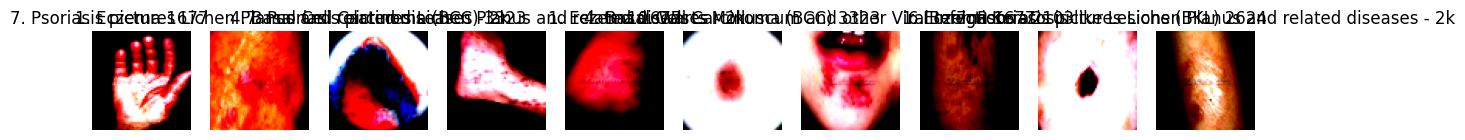


Displaying first 10 samples from Testing Dataset:
label: 3, class: 4. Basal Cell Carcinoma (BCC) 3323


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4096808..2.04885].


label: 4, class: 6. Benign Keratosis-like Lesions (BKL) 2624


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5190226..1.8367476].


label: 5, class: 7. Psoriasis pictures Lichen Planus and related diseases - 2k


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..1.5836121].


label: 6, class: 8. Seborrheic Keratoses and other Benign Tumors - 1.8k


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..1.8562579].


label: 4, class: 6. Benign Keratosis-like Lesions (BKL) 2624


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8479164..1.9928299].


label: 5, class: 7. Psoriasis pictures Lichen Planus and related diseases - 2k


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.398588..0.9245249].


label: 3, class: 4. Basal Cell Carcinoma (BCC) 3323


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..1.32948].


label: 4, class: 6. Benign Keratosis-like Lesions (BKL) 2624


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0839186..1.5836121].


label: 1, class: 10. Warts Molluscum and other Viral Infections - 2103


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3199205..0.7888305].


label: 3, class: 4. Basal Cell Carcinoma (BCC) 3323


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3592544..2.494703].


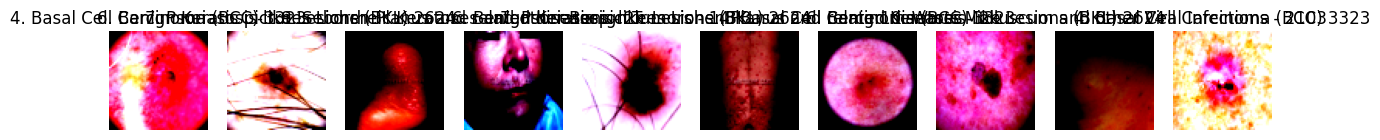

In [4]:
import matplotlib.pyplot as plt

print("\nDisplaying first 10 samples from Training Dataset:")
plt.figure(figsize=(15, 5))

for i in range(10):
    image, label = train_dataset[i]  
    class_name = train_dataset.dataset.classes[label]
    print(f"label: {label}, class: {class_name}")

    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy())  # Convert tensor to image format
    plt.title(class_name)
    plt.axis('off')

plt.show()

print("\nDisplaying first 10 samples from Testing Dataset:")
plt.figure(figsize=(15, 5))

for i in range(10):
    image, label = test_dataset[i]
    class_name = test_dataset.dataset.classes[label]
    print(f"label: {label}, class: {class_name}")
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy()) 
    plt.title(class_name)
    plt.axis('off') 

plt.show()

In [5]:
from NN_class import ConvNeuralNet

model = ConvNeuralNet(NUM_CLASSES)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_model(model, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        train_loss, correct, total = 0.0, 0, 0
        all_preds, all_labels = [], []

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        train_accuracy = correct / total
        train_precision = precision_score(all_labels, all_preds, average="weighted", zero_division=0)
        train_recall = recall_score(all_labels, all_preds, average="weighted", zero_division=0)
        train_f1 = f1_score(all_labels, all_preds, average="weighted", zero_division=0)

        wandb.log({
            "Epoch": epoch + 1,
            "Train Loss": train_loss / len(train_loader),
            "Train Accuracy": train_accuracy,
            "Train Precision": train_precision,
            "Train Recall": train_recall,
            "Train F1 Score": train_f1
        })

        print(f"\nEpoch [{epoch+1}/{num_epochs}] - Loss: {train_loss/len(train_loader):.4f}, "
              f"Acc: {train_accuracy:.4f}, Precision: {train_precision:.4f}, "
              f"Recall: {train_recall:.4f}, F1: {train_f1:.4f}\n")


    return model

model = train_model(model, criterion, optimizer, EPOCHS_NUM)


Epoch [1/25] - Loss: 1.5232, Acc: 0.3847, Precision: 0.3627, Recall: 0.3847, F1: 0.3608


Epoch [2/25] - Loss: 1.3295, Acc: 0.4549, Precision: 0.4408, Recall: 0.4549, F1: 0.4391


Epoch [3/25] - Loss: 1.2073, Acc: 0.4988, Precision: 0.4893, Recall: 0.4988, F1: 0.4877


Epoch [4/25] - Loss: 1.1397, Acc: 0.5313, Precision: 0.5235, Recall: 0.5313, F1: 0.5227


Epoch [5/25] - Loss: 1.0703, Acc: 0.5666, Precision: 0.5615, Recall: 0.5666, F1: 0.5617


Epoch [6/25] - Loss: 1.0132, Acc: 0.6006, Precision: 0.5968, Recall: 0.6006, F1: 0.5961


Epoch [7/25] - Loss: 0.9388, Acc: 0.6272, Precision: 0.6242, Recall: 0.6272, F1: 0.6242


Epoch [8/25] - Loss: 0.8686, Acc: 0.6640, Precision: 0.6620, Recall: 0.6640, F1: 0.6617


Epoch [9/25] - Loss: 0.8021, Acc: 0.6905, Precision: 0.6887, Recall: 0.6905, F1: 0.6886


Epoch [10/25] - Loss: 0.7409, Acc: 0.7180, Precision: 0.7164, Recall: 0.7180, F1: 0.7163


Epoch [11/25] - Loss: 0.6532, Acc: 0.7542, Precision: 0.7528, Recall: 0.7542, F1: 0.7527


Epoch [

In [7]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    wandb.log({"final_train_accuracy": accuracy})
    print('Accuracy of the network on the {} train images: {} %'.format(len(dataset), accuracy))

Accuracy of the network on the 14317 train images: 95.82545813131728 %


In [8]:
torch.save(model.state_dict(), "../files/classification_model.pth")
print("Model saved as 'classification_model.pth'")
wandb.finish()

Model saved as 'classification_model.pth'


Epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Train Accuracy,▁▂▂▃▃▄▄▅▅▅▆▆▆▇▇▇▇████████
Train F1 Score,▁▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇▇████████
Train Loss,█▇▆▆▆▅▅▄▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
Train Precision,▁▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇▇████████
Train Recall,▁▂▂▃▃▄▄▅▅▅▆▆▆▇▇▇▇████████
final_train_accuracy,▁
Epoch,25
Train Accuracy,0.92604
Train F1 Score,0.92591
Train Loss,0.23905


In [9]:
model = ConvNeuralNet(num_classes=NUM_CLASSES)
model.load_state_dict(torch.load("../files/classification_model.pth"))
model.eval()

C:\Users\User\AppData\Local\Temp\ipykernel_16556\3048375035.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("classification_model.pth"))

ConvNeuralNet(
  (conv_layer1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=10816, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=7, bias=True)
)